In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns


In [2]:
# Cargamos el DataFrame df_merged desde el archivo merged_data.csv
df_merged = pd.read_csv('merged_data.csv')

In [4]:
#Resumen estadístico de los datos
resumen_estadistico = df_merged.describe()
print(resumen_estadistico)

             item_id  playtime_forever  sentiment_analysis  release_year
count   20907.000000      20907.000000        20907.000000  20907.000000
mean     6625.730234       4891.222127            1.152676   2004.954417
std     28417.292292      14350.177625            0.512200      2.878379
min        10.000000          0.000000            0.000000   1993.000000
25%       240.000000         92.000000            1.000000   2004.000000
50%       550.000000        629.000000            1.000000   2006.000000
75%      4000.000000       2998.000000            1.000000   2006.000000
max    326460.000000     356217.000000            2.000000   2017.000000


In [5]:
# Géneros que más aparecen en los juegos
frecuencia_generos = df_merged['genres'].apply(eval).explode().value_counts()
print(frecuencia_generos)

genres
Action                   12248
Indie                     8570
Simulation                8066
RPG                        610
Adventure                  472
Strategy                   447
Free to Play               161
Casual                     123
Massively Multiplayer       68
Racing                      31
Early Access                 7
Sports                       5
Name: count, dtype: int64


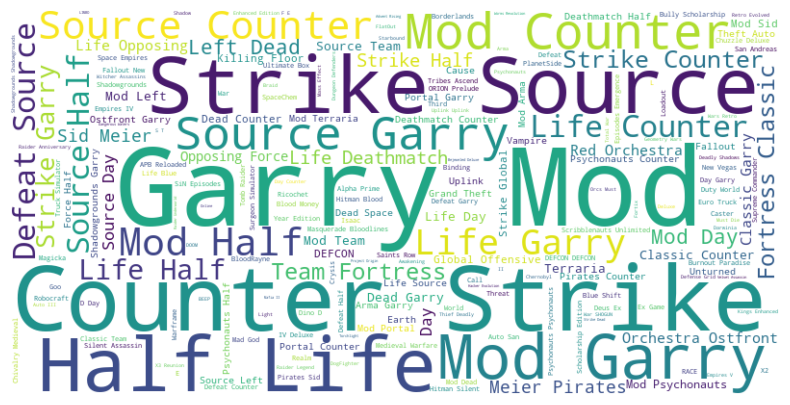

In [7]:
#Nube de Palabras

# Combinar todos los títulos en un solo texto
titulos = " ".join(df_merged['title'])

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titulos)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

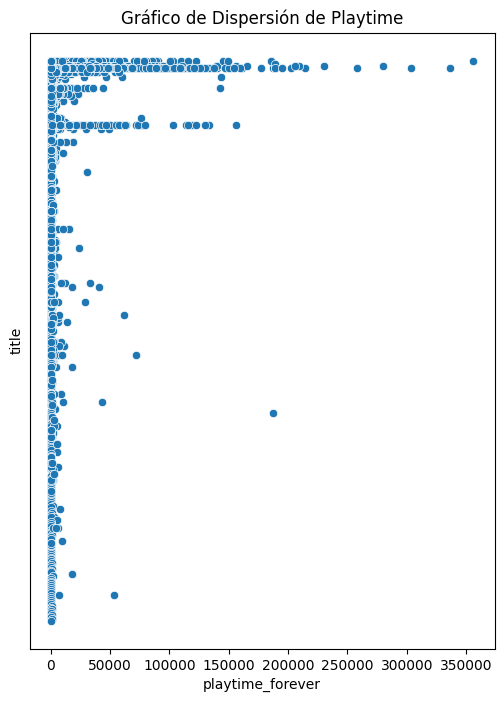

Top 5 Juegos con Mayor Playtime:
                                title  playtime_forever
99                        Garry's Mod        71711716.0
45             Counter-Strike: Source        15246390.0
43                     Counter-Strike         4646614.0
44   Counter-Strike: Global Offensive         2519138.0
112                       Half-Life 2         1443567.0


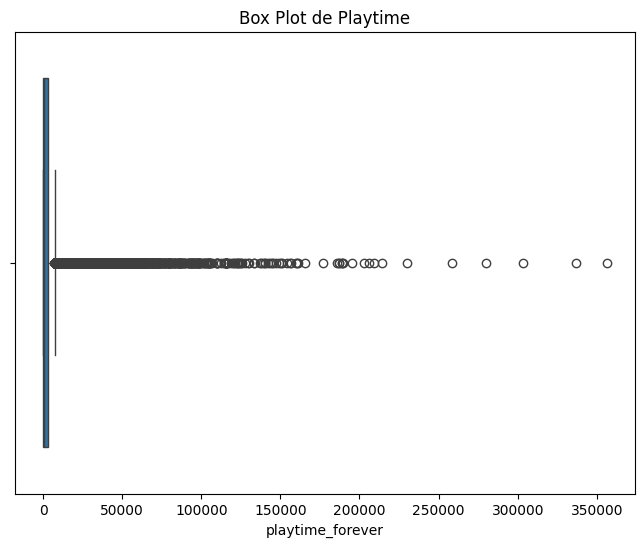

In [26]:
# Gráfico de dispersión
plt.figure(figsize=(6, 8))
sns.scatterplot(x='playtime_forever', y='title', data=df_merged)
plt.title('Gráfico de Dispersión de Playtime')
plt.yticks([])
plt.show()

# Juegos con mayor cantidad de horas jugadas
df_summarized = df_merged.groupby('title')['playtime_forever'].agg('sum').reset_index()
top_5_games = df_summarized.sort_values(by='playtime_forever', ascending=False).head(5)
print("Top 5 Juegos con Mayor Playtime:")
print(top_5_games[['title', 'playtime_forever']])

# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='playtime_forever', data=df_merged)
plt.title('Box Plot de Playtime')
plt.show()

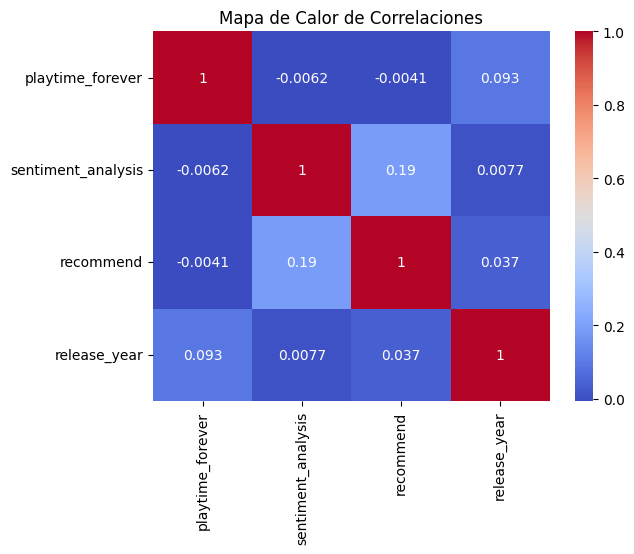

In [24]:
correlaciones = df_merged[['playtime_forever', 'sentiment_analysis', 'recommend', 'release_year']].corr()
sns.heatmap(correlaciones, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlaciones')
plt.show()
